# Python Homework 3

**Release date:** Saturday, May 9<br>
**Due date:** Friday, May 22, at midnight via <font color="blue">Gradescope</font> 

**Instruction:** Please upload your jupyter notebook on <font color="blue">Gradescope</font> with filename __PythonHW3_YOURPERMNUMBER.ipynb__.


Load some packages:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
np.random.seed(2020)

## Problem 1 (10 Points)

1. Simulate three different paths (realizations) of a standard Brownian motion on $[0,1]$ and plot your results in one graph.

_Hint:_ Discretize the time interval $[0,1]$ in sufficiently small subintervals of same length with stepsize $1/n$, i.e., choose a sufficiently large number of steps $n$ (e.g., $n=10000$). 


##### Method 1

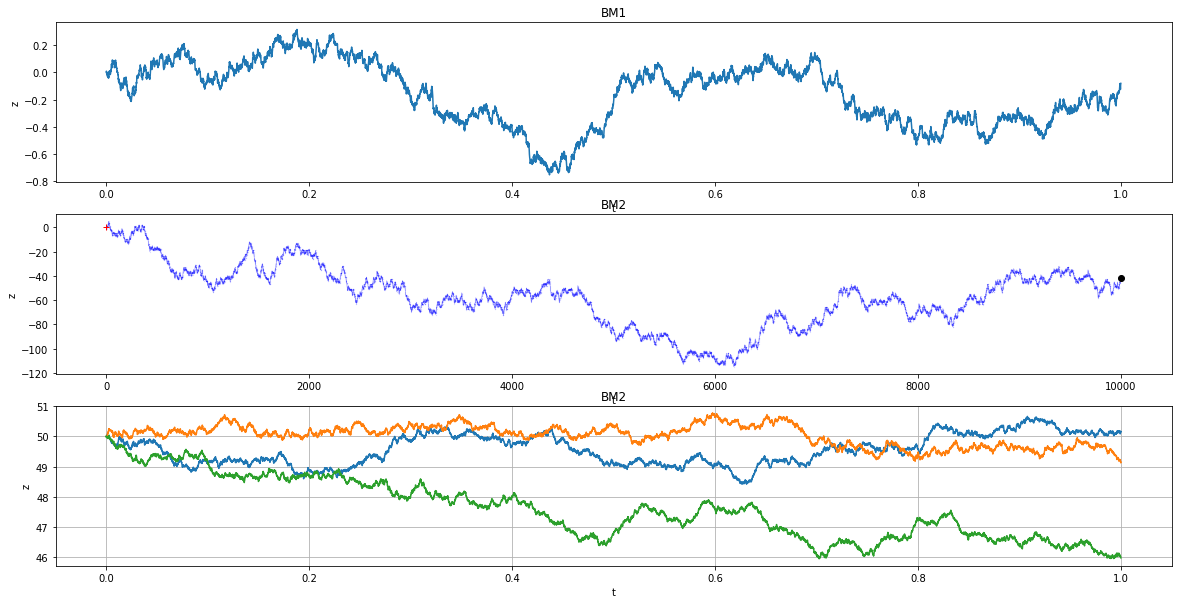

In [7]:
# WRITE YOUR OWN CODE HERE! FEEL FREE TO INSERT MORE CELLS!
# ADD SOME COMMENTS TO YOUR CODE! 
plt.figure(figsize=[20,10])

# the time threshold
T = 1 
# number of steps
N = 10000 
# steps we used
dt = T/N 

# Method 1

t = np.linspace(0,T,N) # linspace 
#print(t)
z = np.random.standard_normal(size=N) # make a standard_normal distribution
z = np.cumsum(z) * np.sqrt(dt) # simulate the walk using cumulative of z multipling the sqrt of steps

ax = plt.subplot(3,1,1)
# the x label show the motion in time level
ax.set_xlabel('t') 
ax.set_ylabel('z')
ax.set_title(u'BM1')
ax.plot(t,z)

# Method 2 this will be used to expand to 2D in the next problem
dims = 1
# start from 0 and the most distance is 1
step_set = [-1, 0, 1] 
origin = np.zeros((1,dims))
step_shape = (N,dims)
#genrate the random steps 
steps = np.random.choice(a=step_set, size=step_shape) 
#sum the historical steps to 1D array
path = np.concatenate([origin, steps]).cumsum() 
#define the start 
start = path[:1] 
#define the end
stop = path[-1:] 
# Plot the path
ax = plt.subplot(3,1,2)
ax.scatter(np.arange(N+1), path, c='blue',alpha=0.25,s=0.05)
ax.plot(path,c='blue',alpha=0.5,lw=0.5,ls='-')
ax.plot(0, start, c='red', marker='+')
ax.plot(N, stop, c='black', marker='o')
ax.set_xlabel('t')
ax.set_ylabel('z')
ax.set_title('BM2')
#plt.tight_layout(pad=0)


# Method 3
# the bias parameter
delta = 2
# number of realizations to generate.
m = 3
# array to store the realizations.
x = np.empty((m,N+1))
# initial value
x[:, 0] = 50

def brownian(x0, n, dt, delta, out=None):
    x0 = np.asarray(x0)

    # For each element of x0, generate a sample of n numbers from a
    # normal distribution.
    r = norm.rvs(size=x0.shape + (n,), scale=delta*np.sqrt(dt))

    # If `out` was not given, create an output array.
    if out is None:
        out = np.empty(r.shape)

    # This computes the Brownian motion by forming the cumulative sum of
    # the random samples. 
    np.cumsum(r, axis=-1, out=out)

    # Add the initial condition.
    out += np.expand_dims(x0, axis=-1)
    return out
    
brownian(x[:,0], N, dt, delta, out=x[:,1:])

ax = plt.subplot(3,1,3)
t = np.linspace(0.0, N*dt, N+1)
for k in range(m):
    ax.plot(t, x[k])
ax.set_xlabel('t')
ax.set_ylabel('z')
ax.set_title('BM2')
ax.grid()

plt.show()

2. A two-dimensional (standard) Brownian motion $(B_t)_{t \geq 0} = ((B^1_t, B^2_t))_{t \geq 0}$ with values in $\mathbb{R}^2$ is given by two one-dimensional $\mathbb{R}$-valued independent (standard) Brownian motions $(B^1_t)_{t \geq 0}$ and $(B^2_t)_{t \geq 0}$. Simulate a realization of a two-dimensional (standard) Brownian motion on the $\mathbb{R}^2$ plane for $t$ running from $0$ to $1$ and plot your result.

<i>Hint:</i> You can use your implementation from 1.

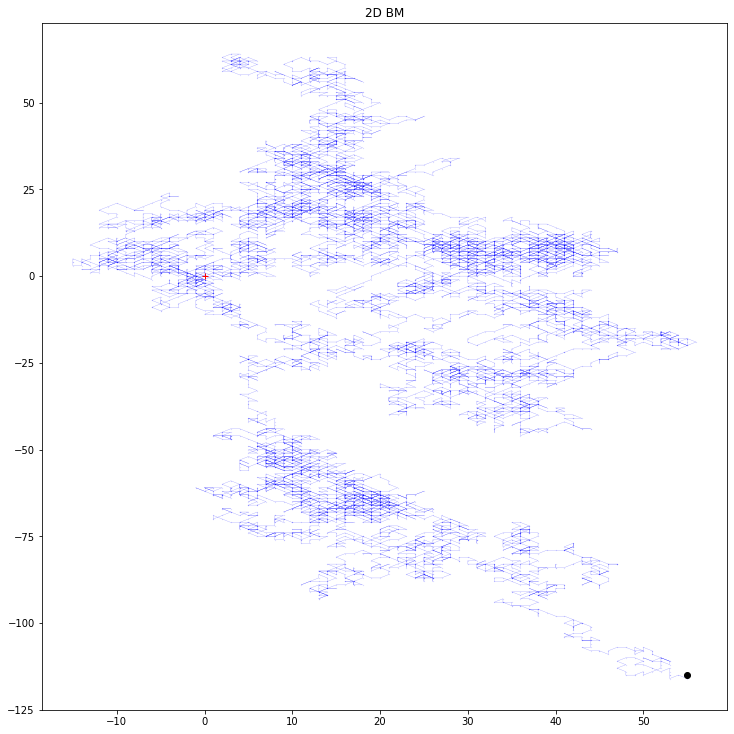

In [3]:
# Define parameters
dims = 2 # 2d problem
step_n = 10000
step_set = [-1, 0, 1]
origin = np.zeros((1,dims))
# Simulate steps in 2D
step_shape = (step_n,dims)
steps = np.random.choice(a=step_set, size=step_shape) #generate steps for 2 direction within length of 1
path = np.concatenate([origin, steps]).cumsum(0)
start = path[:1]
stop = path[-1:]
# Plot the path
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(path[:,0], path[:,1],c='blue',alpha=0.25,s=0.05)
ax.plot(path[:,0], path[:,1],c='blue',alpha=0.5,lw=0.25,ls='-')
ax.plot(start[:,0], start[:,1],c='red', marker='+')
ax.plot(stop[:,0], stop[:,1],c='black', marker='o')
plt.title('2D BM')
plt.tight_layout(pad=0)
plt.show()

## Problem 2 (10 Points)

Let $(B_t)_{t \geq 0}$ be a standard Brownian motion. For $\mu \in \mathbb{R}$ and $\sigma \in \mathbb{R}_+$, the process $(X_t)_{t \geq 0}$ defined by 

$$ X_t = \mu t + \sigma B_t \qquad (t \geq 0)$$

is called __Brownian motion with drift parameter $\mu$ and variance parameter $\sigma^2$__. Moreover, the process $(S_t)_{t \geq 0}$ defined by 

$$ S_t = S_0 \cdot e^{X_t} \qquad (t \geq 0)$$

with starting value $S_0 > 0$ is called __geometric Brownian motion__.



1. Simulate a path of a geometric Brownian motion $(S_t)_{0 \leq t \leq T}$ with parameters $\mu = 0.1, \sigma = 0.176, S_0 = 1125$ on the time interval $[0,5/12]$ (i.e. $T=5/12$). Plot the result.

_Hint:_ Similar to Problem 1 above, discretize the time interval $[0,5/12]$ in sufficiently small subintervals of same length with stepzise $T/n$ (e.g., $n=10000$).  

##### based on 1.1

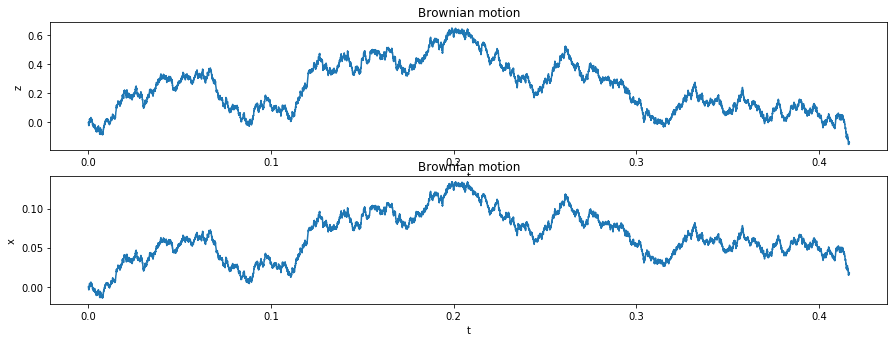

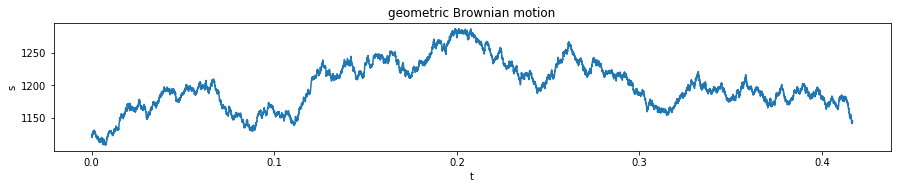

In [4]:
# WRITE YOUR OWN CODE HERE! FEEL FREE TO INSERT MORE CELLS!
# ADD SOME COMMENTS TO YOUR CODE!

plt.figure(figsize=(15,8))

#define parameters
T = 5/12
N = 10000
dt = T/N
t = np.linspace(0,T,N)

z = np.random.standard_normal(size=N)
z = np.cumsum(z) * np.sqrt(dt)

ax = plt.subplot(3,1,1)
ax.set_xlabel('t')
ax.set_ylabel('z')
ax.set_title(u'Brownian motion')
ax.plot(t,z)

a = 0.1 
b = 0.176
x = a*t+b*z
ax = plt.subplot(3,1,2)
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_title(u'Brownian motion')
ax.plot(t,x)

s0 = 1125
s = s0 * np.exp(x)
ax = plt.subplot(3,1,3)
ax.set_xlabel('t')
ax.set_ylabel('s')
ax.set_title(u'geometric Brownian motion')
ax.plot(t,s)
plt.show()

2. In the model introduced by Fisher Black, Myron Scholes, and Robert Merton (1973) for pricing so-called *stock options*, stock price processes are modeled as geometric Brownian motions. A stock option is a contract that gives the buyer of the option the right to receive a certain pre-determined payoff at a future point in time from the option's seller. Typically, the payoff depends on the future evolution of an underlying stock price: For example, a so-called *lookback option* on a stock with maturity $T=5/12$ pays the buyer of the option the payoff $$ S_{5/12} - \min_{t \, \in\, [0,5/12]} S_t$$ at time $T=5/12$, where $(S_t)_{t \geq 0}$ denotes the price process of the underlying stock. Find an approximation of the future expected payoff of this option by running 10000 simulations. Assume that the price follows a geometric Brownian motion with parameters as given in 1.

risk-free interest rate is 0.11548800000000001


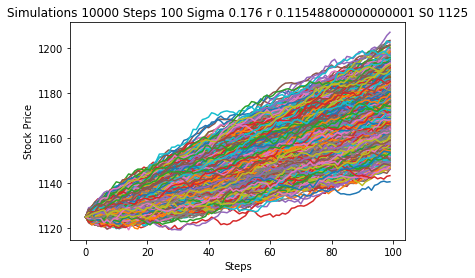

45.179076779127094


In [5]:
import numpy as np
from matplotlib import pyplot as plt

S0 = 1125 #initial stock price in point 1
mu = 0.1 #in point 1 
sigma = 0.176 #volatility in market in point 1
#In Example 8.20, it was shown that Equation (8.13) holds for geometric Brownian
#motion if r = 𝜇 + 𝜎2∕2
r = mu + (sigma**2)/2 # risk-free interest rate. 无风险利率
print("risk-free interest rate is " + str(r))

T = 5/12 #time in years, here i guess we use 5 months of the year
N = 100 #number of steps within each simulation
delta = T/N #time step
i = 10000 #number of simulations requested 

discount_rate = np.exp(-r*T) 
#To find its present value requires discounting the future
#amount by a factor of e−rt. That is, P = e−rtF

S = np.zeros([i,N])
t = range(0,N,1)

for y in range(0,i-1):
    S[y,0]=S0
    for x in range(0,N-1):
        S[y,x+1] = S[y,x]*(np.exp((r-(sigma**2)/2)*delta + sigma*delta*np.random.normal(0,1)))
    plt.plot(t,S[y])

title = 'Simulations {0} Steps {1} Sigma {2} r {3} S0 {4}'.format(i, N, sigma, r, S0)
plt.title(title)
plt.xlabel('Steps')
plt.ylabel('Stock Price')
plt.show()

C = np.zeros((i-1,1), dtype=np.float16)
for y in range(0,i-1):
    C[y]=np.maximum(S[y,N-1]-S0,0) #calculate the maximum value

PayoffAverage = np.average(C)
MaxPayoff = discount_rate*PayoffAverage

print(MaxPayoff)